In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import h5py
url = '/content/gdrive/My Drive/ml project/Untitled folder/dataml.h5'
a = h5py.File(url,'r')
x_train = a['x_train']
y_train = a['Y_train']
x_test = a['x_test']
y_test = a['y_test']

In [0]:
import numpy as np
x_train=np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
x_train = x_train.reshape(-1,8,8,8,1)
x_test = x_test.reshape(-1,8,8,8,1)


In [0]:
import tensorflow as tf
from tensorflow import keras

new_model = keras.models.Sequential()

new_model.add(keras.layers.Conv3D(32, (3,3,1)  , activation = 'relu' , padding = 'same' , input_shape=(8,8,8,1)))
new_model.add(keras.layers.Conv3D(32, (3,3,1) , padding = 'same' , activation = 'relu' ))

new_model.add(keras.layers.AveragePooling3D((2,2,1) , padding = 'same'))
new_model.add(keras.layers.Conv3D(64, (3,3,1) , padding = 'same' , activation = 'relu' ))
new_model.add(keras.layers.Conv3D(64, (3,3,1) , padding = 'same' , activation = 'relu' ))

new_model.add(keras.layers.Dropout(0.25))
new_model.add(keras.layers.Flatten())
new_model.add(keras.layers.Dense(5000 , activation = 'relu'))
new_model.add(keras.layers.Dense(2000 , activation = 'relu'))
new_model.add(keras.layers.Dropout(0.25))
new_model.add(keras.layers.Dense(600 , activation = 'relu'))
new_model.add(keras.layers.Dropout(0.25))
new_model.add(keras.layers.Dense(120 , activation = 'relu'))
new_model.add(keras.layers.Dense(60 , activation = 'relu'))
new_model.add(keras.layers.Dense(1, activation = 'linear'))
              
new_model.compile(optimizer = 'adam' , loss = 'mean_squared_error' , metrics = ['accuracy' ])


In [15]:
new_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_12 (Conv3D)           (None, 8, 8, 8, 32)       320       
_________________________________________________________________
conv3d_13 (Conv3D)           (None, 8, 8, 8, 32)       9248      
_________________________________________________________________
average_pooling3d_2 (Average (None, 4, 4, 8, 32)       0         
_________________________________________________________________
conv3d_14 (Conv3D)           (None, 4, 4, 8, 64)       18496     
_________________________________________________________________
conv3d_15 (Conv3D)           (None, 4, 4, 8, 64)       36928     
_________________________________________________________________
dropout_6 (Dropout)          (None, 4, 4, 8, 64)       0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 8192)             

In [18]:
history = new_model.fit(x_train , y_train, epochs = 20 , batch_size = 5000, validation_split= .25)

Train on 452450 samples, validate on 150817 samples
Epoch 1/20
452450/452450 [==============================] - 134s 296us/sample - loss: 0.3796 - acc: 0.9128 - val_loss: 0.2524 - val_acc: 0.9181
Epoch 2/20
452450/452450 [==============================] - 134s 296us/sample - loss: 0.2668 - acc: 0.9162 - val_loss: 0.2352 - val_acc: 0.9208
Epoch 3/20
452450/452450 [==============================] - 134s 296us/sample - loss: 0.2479 - acc: 0.9169 - val_loss: 0.2320 - val_acc: 0.9217
Epoch 4/20
452450/452450 [==============================] - 134s 296us/sample - loss: 0.2419 - acc: 0.9178 - val_loss: 0.2206 - val_acc: 0.9174
Epoch 5/20
452450/452450 [==============================] - 134s 296us/sample - loss: 0.2273 - acc: 0.9177 - val_loss: 0.2153 - val_acc: 0.9195
Epoch 6/20
452450/452450 [==============================] - 134s 296us/sample - loss: 0.2170 - acc: 0.9167 - val_loss: 0.2052 - val_acc: 0.9198
Epoch 7/20
452450/452450 [==============================] - 134s 296us/sample - loss

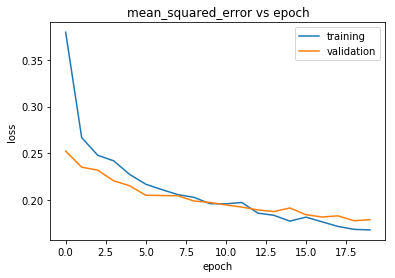

In [19]:
import matplotlib.pyplot as plt
fig = plt.figure()
xlabel = 'epoch'
ylabel = 'loss'
plt_title = 'mean_squared_error vs epoch'
ax = fig.add_subplot(111,xlabel = xlabel , ylabel = ylabel , title = plt_title)
ax.plot(history.history['loss'] , label ='training')
plt.legend()
ax.plot(history.history['val_loss'] , label = 'validation')
plt.legend()
plt.show()

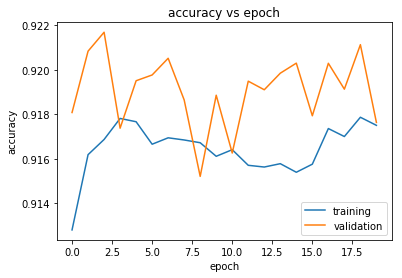

In [20]:
import matplotlib.pyplot as plt
fig = plt.figure()
xlabel = 'epoch'
ylabel = 'accuracy'
plt_title = 'accuracy vs epoch'
ax = fig.add_subplot(111,xlabel = xlabel , ylabel = ylabel , title = plt_title)
ax.plot(history.history['acc'] , label ='training')
plt.legend()
ax.plot(history.history['val_acc'] , label = 'validation')
plt.legend()
plt.show()